# 必要なライブラリをインストール

In [1]:
!pip install mecab-python3
!pip install unidic-lite
!pip install wordcloud
!pip install matplotlib
!apt-get -y install fonts-ipafont-gothic
!pip install ja_ginza
!pip install gensim

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# BeautifulSoupによるスクレイピング

In [2]:
from bs4 import BeautifulSoup
from urllib import request
import re


#　文章のスクレイピング
url = 'https://www.sejuku.net/blog/1185'
response = request.urlopen(url)
soup = BeautifulSoup(response)
response.close()

In [3]:
# 'post_content'クラスのdiv内の文章を取得
main_text = soup.find('div', class_='post_content')

#  テキストの抽出
main_text = main_text.get_text()

# 改行や全角空白をテキストクリーニング
main_text = re.sub(r"[\u3000 \n \r]", "", main_text)
print(main_text)

あなたがプログラミングの学習において気をつけていることは何ですか？ただ何となくやっているのであれば、それは大変もったいないことです。プログラミングは独学の場合、「約1000時間」の習得が目安とされています。これは脱初心者で、という意味です。もちろん、その半分の時間で習得される人もいれば、倍の時間がかかる人もいるでしょう。ではその時間の差は一体なんでしょうか？それは今回ご紹介する「3つの鉄則」をおさえられているかです。「基本」というのは、とても大事なことです。堀江貴文さんも次のように言っていることから、基本をおろそかにする人ほど失敗の可能性は上がります。僕がいつも言っていることは基本に忠実になれということです。基本に忠実なんて言うといやな顔をする人が多いかもしれません。なんだそんなことかと。しかし、これは大事なことなのです。多くの人は基本に忠実にやらないで失敗するのです。プログラミング学習でいう失敗とは「挫折」や「諦め」ですね。この記事を見ているあなたは、もちろんこうなりたくないはずです。ではプログラミング学習における「基本」とは、一体どんなことなのか。この記事では、「プログラミングの基礎知識」と「プログラミングを始める前の心得」をご紹介していきたいと思います。この記事の要約「暗記しない・理解に徹する・発信する」はプログラミング学習の鉄則初心者は「インプット(座学)→アウトプット(実践)」の順で学習がおすすめ学習中の挫折を防ぐには相談できる先生を見つけることなお、どのプログラミング言語を学べばいいのか、どう学習を進めればいいのかなどがあいまいな人は「プログラミング学習プラン診断」をお試しください。かかる時間は1分ほど。4つの質問に答えるだけで、あなたにあう言語や学習プランを診断してもらえます。これからプログラミングを学ぼうとしている人は、ぜひ一度お試しください。＼4つの質問に答えるだけ／1分で診断してみるこの記事の監修者フルスタックエンジニア金田茂樹音楽大学卒業後、15年間中高一貫進学校の音楽教師として勤務。40才のときからIT、WEB系の企業に勤務。livedoor（スーパーバイザー）、楽天株式会社（ディレクター）、アスキーソリューションズ（PM）などを経験。50歳の時より、専門学校でWEB・デザイン系の学科長として勤務の傍ら、副業としてフリーランス活動を開始。20

# ワードクラウド作成

## Mecabによる形態素解析

In [4]:
import MeCab

mecab_tagger = MeCab.Tagger()
node = mecab_tagger.parseToNode(main_text)

vocab_list = []

# 名詞のみを取得し、`vocab_list`に格納
while node:
    word = node.surface
    hinshi = node.feature.split(',')[0]
    if hinshi == "名詞":
        if not word.isnumeric() and not re.match(r'^[\u3040-\u309F]+$', word):
            # 名詞が数値と平仮名のみの場合は除き、それ以外の名詞を保存
            vocab_list.append(word)
        else:
            pass
    node = node.next

## TF-IDF値の取得

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidfモデルの作成と学習
tfidf_model = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b', norm=None)
tfidf_model.fit(vocab_list)

TfidfVectorizer(norm=None, token_pattern='(?u)\\b\\w+\\b')

In [6]:
# 対象のテキストをtf-idf値に変換
vocab_text = " ".join(vocab_list)
tfidf_vec = tfidf_model.transform([vocab_text]).toarray()[0]

# 単語: tf-idf値となるdictに変換
tfidf_dict = dict(zip(tfidf_model.get_feature_names_out(), tfidf_vec))

# tf-idf値が20以上の単語を残す
tfidf_dict = {word: num_val for word, num_val in tfidf_dict.items() if num_val > 20}

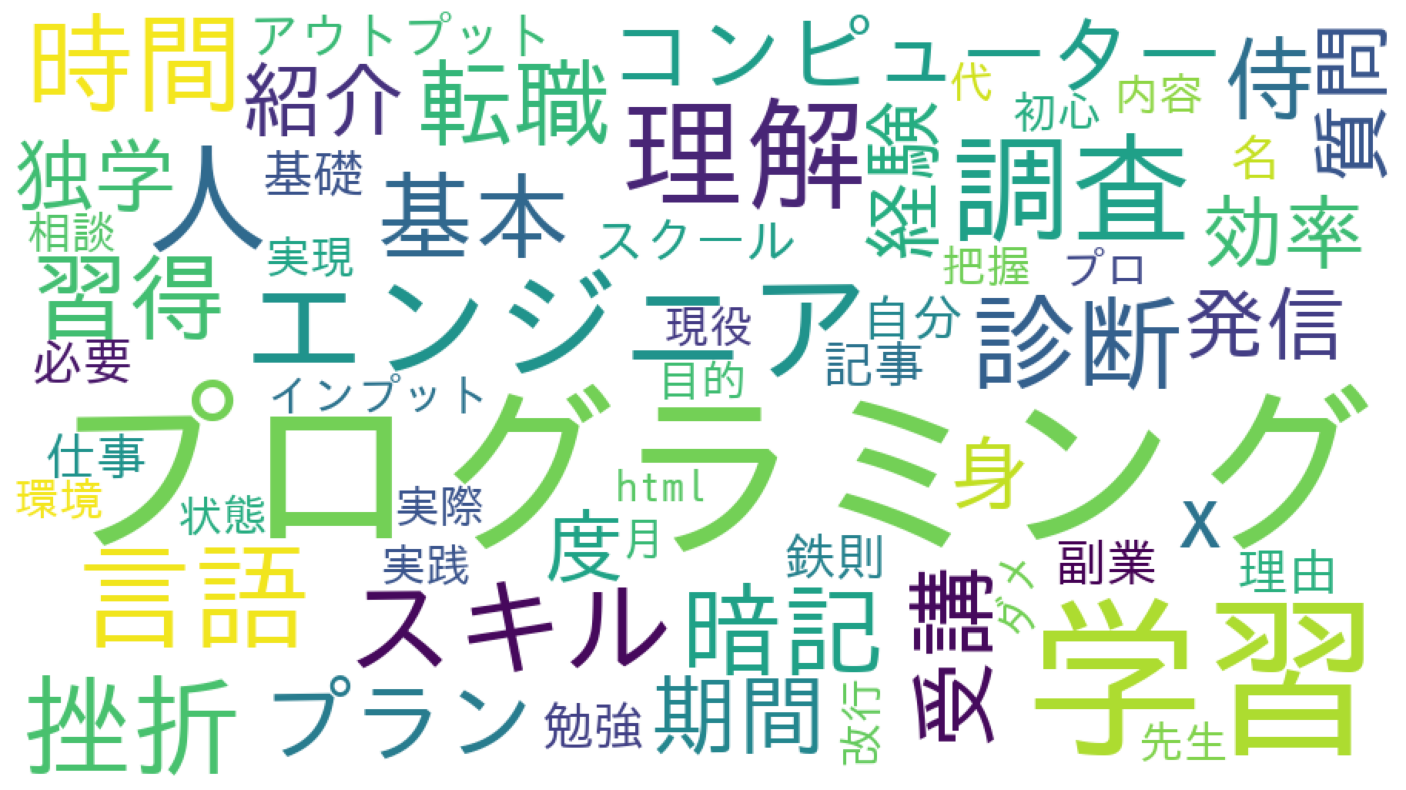

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
wc = WordCloud(background_color="white",width=900, height=500, font_path=font_path).generate_from_frequencies(tfidf_dict)
plt.figure(figsize=(18,10))
plt.axis("off")
plt.imshow(wc)

# spaCyによる固有表現抽出

In [8]:
import spacy

nlp = spacy.load('ja_ginza')
doc = nlp(main_text)
for token in doc:
    print(token.text, type(token))

あなた <class 'spacy.tokens.token.Token'>
が <class 'spacy.tokens.token.Token'>
プログラミング <class 'spacy.tokens.token.Token'>
の <class 'spacy.tokens.token.Token'>
学習 <class 'spacy.tokens.token.Token'>
に <class 'spacy.tokens.token.Token'>
おい <class 'spacy.tokens.token.Token'>
て <class 'spacy.tokens.token.Token'>
気 <class 'spacy.tokens.token.Token'>
を <class 'spacy.tokens.token.Token'>
つけ <class 'spacy.tokens.token.Token'>
て <class 'spacy.tokens.token.Token'>
いる <class 'spacy.tokens.token.Token'>
こと <class 'spacy.tokens.token.Token'>
は <class 'spacy.tokens.token.Token'>
何 <class 'spacy.tokens.token.Token'>
です <class 'spacy.tokens.token.Token'>
か <class 'spacy.tokens.token.Token'>
？ <class 'spacy.tokens.token.Token'>
ただ <class 'spacy.tokens.token.Token'>
何 <class 'spacy.tokens.token.Token'>
と <class 'spacy.tokens.token.Token'>
なく <class 'spacy.tokens.token.Token'>
やっ <class 'spacy.tokens.token.Token'>
て <class 'spacy.tokens.token.Token'>
いる <class 'spacy.tokens.token.Token'>
の <class 'spacy.toke

In [9]:
from spacy import displacy

displacy.render(doc, style="ent", options={"compact":True},  jupyter=True)


In [10]:
position_vocations = []
for ent in doc.ents:
    if ent.label_ == "Position_Vocation":
        position_vocations.append(ent.text)

position_vocations = list(set(position_vocations))
position_vocations

['インストラクター',
 'OFF侍',
 '学習コーチ',
 '現役エンジニア講師',
 '卒業生',
 '講師',
 '学科長',
 '侍',
 'ディレクター',
 '先生',
 '音楽教師',
 'エンジニア',
 '哲学者',
 '侍エンジニア',
 'スクール卒業生',
 '受講生',
 'スーパーバイザー',
 'フリーランス']